
                                Методы градиентного спуска 

Дано:
------------------------
      Целевая функция:    f(x, y) = (x - 1)**2 + 15*(x**2 - y)**2
Начальное приближение:    (x, y) = [0, 0]
 Точность приближения:    eps = 0.01
------------------------

________________________________________________________________________________

                                Метод наискорейщего спуска

           Точка минимума функции:  x_min = [0.99, 0.98]
Значение функции в точке минимума:  f(x_min) = 0.0
              Количество итераций:  k = 511
    Количество вычислений функции: n_f = 10220
Количество вычисленных градиентов: n_g = 512

________________________________________________________________________________

                                Метод градиентного спуска
                                   с дроблениес шага

           Точка минимума функции:  x_min = [0.99, 0.98]
Значение функции в точке минимума:  f(x_min) = 0.0
              Количество итераций:  k = 525
   

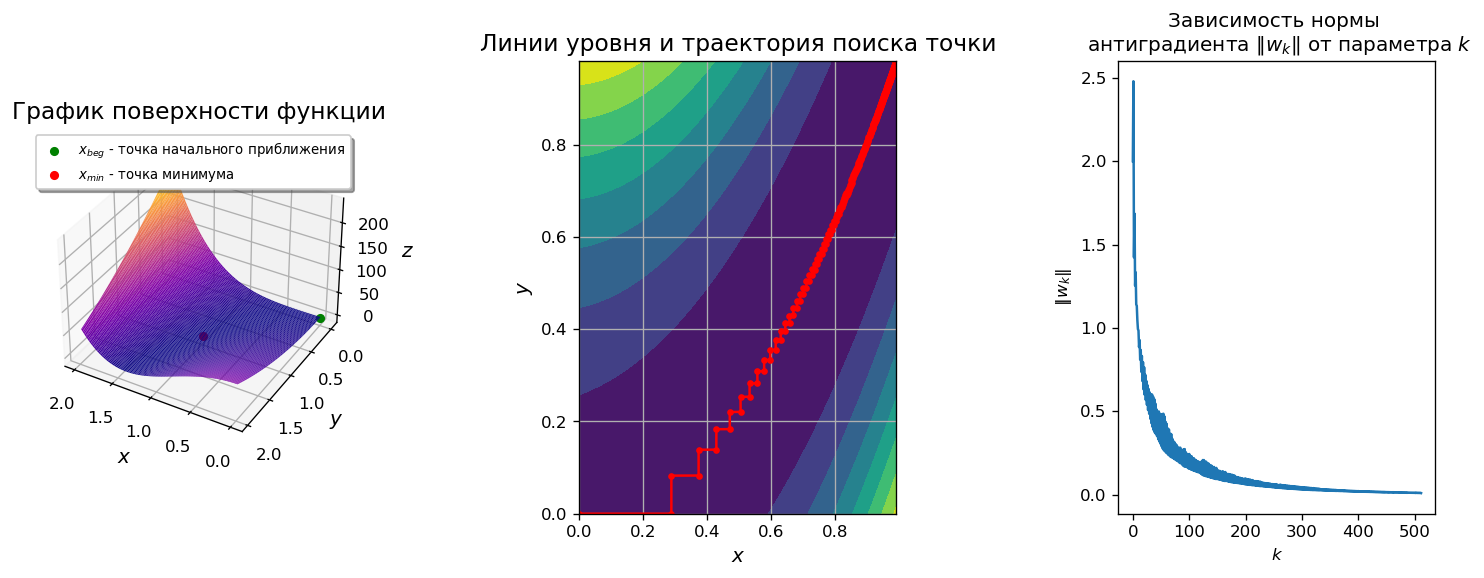

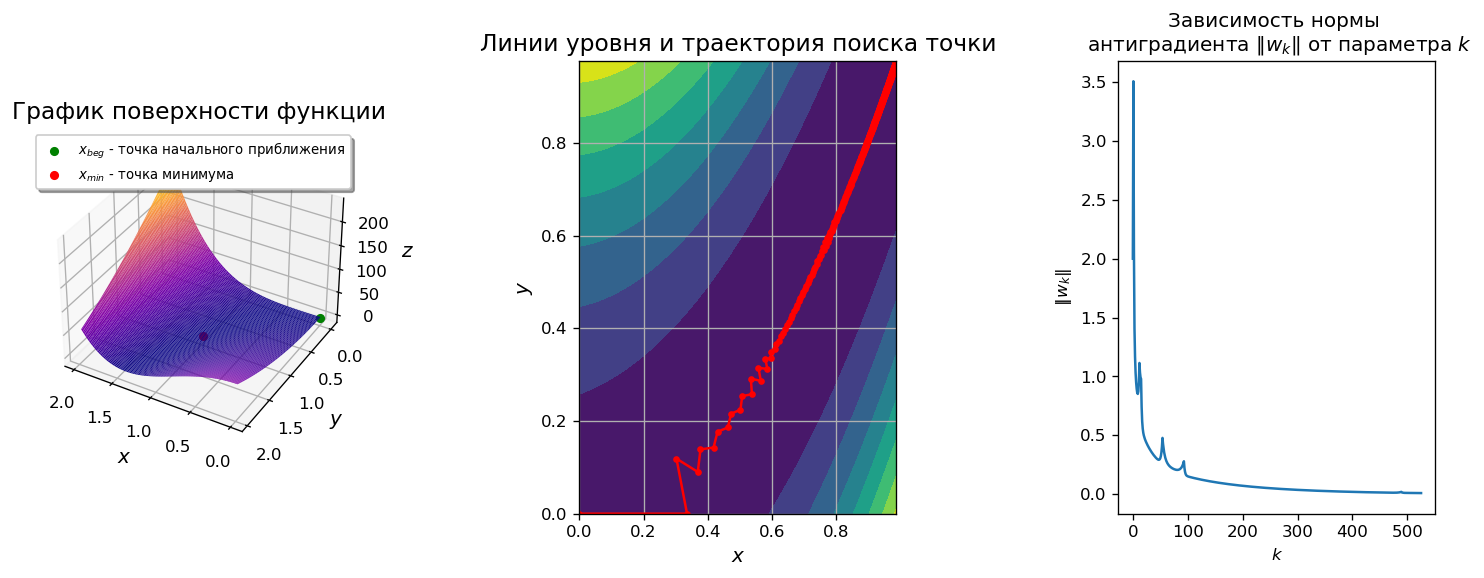

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array

alpha = 15

e_help = 2
eps = 10**(-e_help)

x0 = [0, 0]
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
#foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) + 51

def method_goldenRatio(f, b: float = 3, a: float = 0, e = eps * 1e-1):
    tau = (math.sqrt(5) + 1) / 2
    n_f = 0
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Bk - (Bk - Ak) / tau
    Xk2 = Ak + (Bk - Ak) / tau
    
    y1, y2 = f(Xk1), f(Xk2)
    n_f += 2

    while lk > e:
        if y1 < y2:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = f(Xk1)
            n_f += 1
        else:
            
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = f(Xk2)
            n_f += 1
        lk = Bk - Ak
    return (Ak + Bk) / 2, n_f


x_, y_ = Symbol('x'), Symbol('y')
grad_f = lambdify((x_, y_), derive_by_array(foo(x_, y_), (x_, y_)), 'numpy')


# x = [-1, -2] -- дефолтное начальное приближение 
# flag = 0 / 1 --  метод наискорейшего спуска / метод дробления шага
def gradient_decent(flag = 0, x = x0):
    
    f = lambda x: foo(x[0], x[1])
    anti_grad = lambda x: -grad_f(x[0], x[1])
    
    n_f = 0
    n_g = 0

    #kappa = 0.5
    kappa_k = 1

    omega = 0.3
    gamma = 0.8

    # wk -- k-направление спуска, w_norm -- норма вектора направления w
    #||wk|| <= eps -- критерий останова 
    w_norm = []
    xk = [[], []]

    while True:

        xk[0].append(x[0])
        xk[1].append(x[1])

        wk = anti_grad(x)
        n_g += 1
        w_norm.append(np.linalg.norm(wk))
        
        if w_norm[-1] <= eps:
            break
        
        fk = f(x)
        n_f += 1
        #метод наискорейшего спуска
        if flag == 0:
            temp = 0
            phi_k = lambda kappa: f(x + kappa * wk)            
            kappa_k, temp = method_goldenRatio(phi_k)
            x = x + kappa_k * wk
            n_f += temp
        #метод дробления шага
        elif flag == 1:
            x_cur = x + kappa_k * wk
            n_f += 1
            while fk - f(x_cur) <= omega * kappa_k * w_norm[-1]**2:
                kappa_k *= gamma
                x_cur = x + kappa_k * wk
                n_f += 1
            x = x_cur
            
    return x, xk, w_norm, n_f, n_g


#def draw_counterplot_only(x_min, xk, w_norm, flag):
    fig, ax = plt.subplots(figsize = (10,10))

    
    x, y = np.meshgrid(np.linspace(min(xk[0]), max(xk[0]), 1000), np.linspace(min(xk[1]), max(xk[1]), 1000))
    
    #x, y = np.meshgrid(np.linspace(xk[0][0], xk[0][-1], 1000), np.linspace(xk[1][0], xk[1][-1], 1000))
    z = foo(x, y)

    # построим линии уровня
    ax.contourf(x, y, z)
    # траектория поиска точки минимума
    ax.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')

    # подписи к осям
    ax.set_xlabel('$x$', fontsize = 15)
    ax.set_ylabel('$y$', fontsize = 15)
    ax.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 16})

    # создадим сетку 
    plt.grid(linestyle = '-')

    plt.show()

    pass

def draw_all(x_min, xk, w_norm, flag):

    fig = plt.figure(figsize = (15, 5), dpi=120)

    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    plt.subplots_adjust(wspace=0.7)

    coef = max(abs(x0[0] - x_min[0]), abs(x0[1]-x_min[1]))
    x, y = np.meshgrid(np.linspace(x_min[0] - coef, x_min[0] + coef, 100),np.linspace(x_min[1] - coef, x_min[1] + coef, 100))
    z = foo(x, y)

    ax1.plot_surface(x,y,z, rstride=1, cstride=1, cmap = "plasma")
    ax1.scatter(xk[0][0], xk[1][0], foo(xk[0][0], xk[1][0]), s = 20, c = 'green', label="$x_{beg}$ - точка начального приближения")
    ax1.scatter(x_min[0], x_min[1], foo(x_min[0], x_min[1]), s = 20, c = 'red', label="$x_{min}$ - точка минимума")
    ax1.legend(shadow=True, fontsize=8)
    ax1.view_init(35, 120)
    ax1.set_xlabel('$x$', fontsize = 12)
    ax1.set_ylabel('$y$', fontsize = 12)
    ax1.set_zlabel('$z$', fontsize = 12)
    ax1.set_title('График поверхности функции', fontdict = {'fontsize' : 14})


    #x, y = np.meshgrid(xk[0], xk[1])
    x, y = np.meshgrid(np.linspace(min(xk[0]), max(xk[0]), 1000), np.linspace(min(xk[1]), max(xk[1]), 1000))

    z = foo(x, y)
    #ax2.
    # построим линии уровня
    ax2.contourf(x, y, z)
    # траектория поиска точки минимума
    ax2.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')
    # подписи к осям
    ax2.set_xlabel('$x$', fontsize = 12)
    ax2.set_ylabel('$y$', fontsize = 12)
    ax2.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 14})

    # создадим сетку 
    ax2.grid(linestyle = '-')

    k = range(len(w_norm))
    #x, y = np.meshgrid(k , w_norm)
    ax3.plot(k, w_norm)
    ax3.set_xlabel('$k$')
    ax3.set_ylabel('$ \| \! \| w_k \| \! \| $')
    ax3.set_title('Зависимость нормы \n антиградиента $ \| \! \| w_k \| \! \| $ от параметра $k$')



    pass


print("\n", ' ' * 30, "Методы градиентного спуска","\n")
print("Дано:")
print("-" * 24)
print("      Целевая функция:    f(x, y) =", foo(x_,y_))
print("Начальное приближение:    (x, y) =", x0)
print(" Точность приближения:    eps =", eps)
print("-" * 24)
for i in range (2):
    print("\n" + "_" * 80)
    if i == 0:
        print("\n", ' ' * 30, "Метод наискорейщего спуска\n")
    elif i == 1:
        print("\n", ' ' * 30, "Метод градиентного спуска")
        print(' ' * 34, "с дроблениес шага\n")
    x_min, xk, w_norm, n_f, n_g = gradient_decent(i)
    print("           Точка минимума функции:  x_min =", [round(x_min[0], e_help), round(x_min[1], e_help)])
    print("Значение функции в точке минимума:  f(x_min) =", round(foo(x_min[0], x_min[1]), e_help))
    print("              Количество итераций:  k =", len(w_norm) - 1)
    print("    Количество вычислений функции: n_f =", n_f)
    print("Количество вычисленных градиентов: n_g =", n_g)
    draw_all(x_min, xk, w_norm, i)
plt.show()
    



                                Методы градиентного спуска 

Дано:
------------------------
      Целевая функция:    f(x, y) = 5*x**2 + 4*x*y + 8.94427190999916*x + 2*y**2 + 8.94427190999916*y + 51
Начальное приближение:    (x, y) = [1, 2]
 Точность приближения:    eps = 0.01
------------------------

________________________________________________________________________________

                                Метод наискорейщего спуска

           Точка минимума функции:  x_min = [0.0, -2.23]
Значение функции в точке минимума:  f(x_min) = 41.0
              Количество итераций:  k = 8
    Количество вычислений функции:  n_f = 168
Количество вычисленных градиентов:  n_g = 9

________________________________________________________________________________

                                Метод градиентного спуска
                                   с дроблениес шага

           Точка минимума функции:  x_min = [-0.0, -2.23]
Значение функции в точке минимума:  f(x_min) = 41.0
       

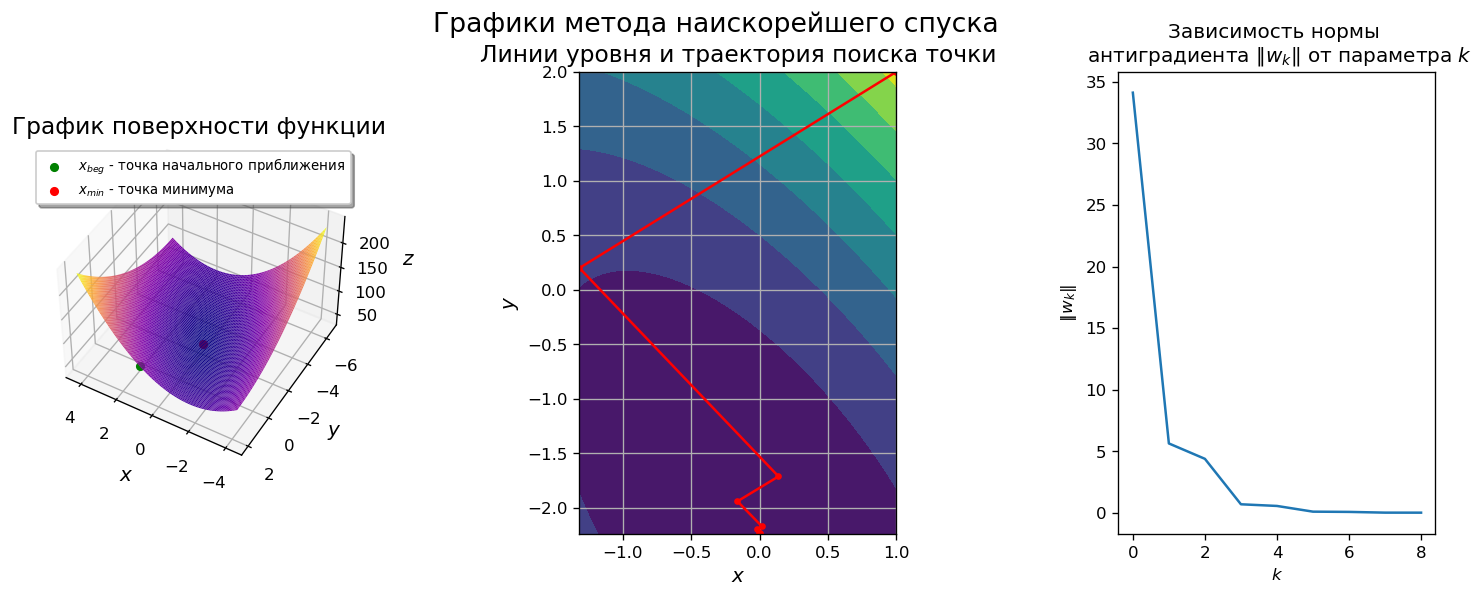

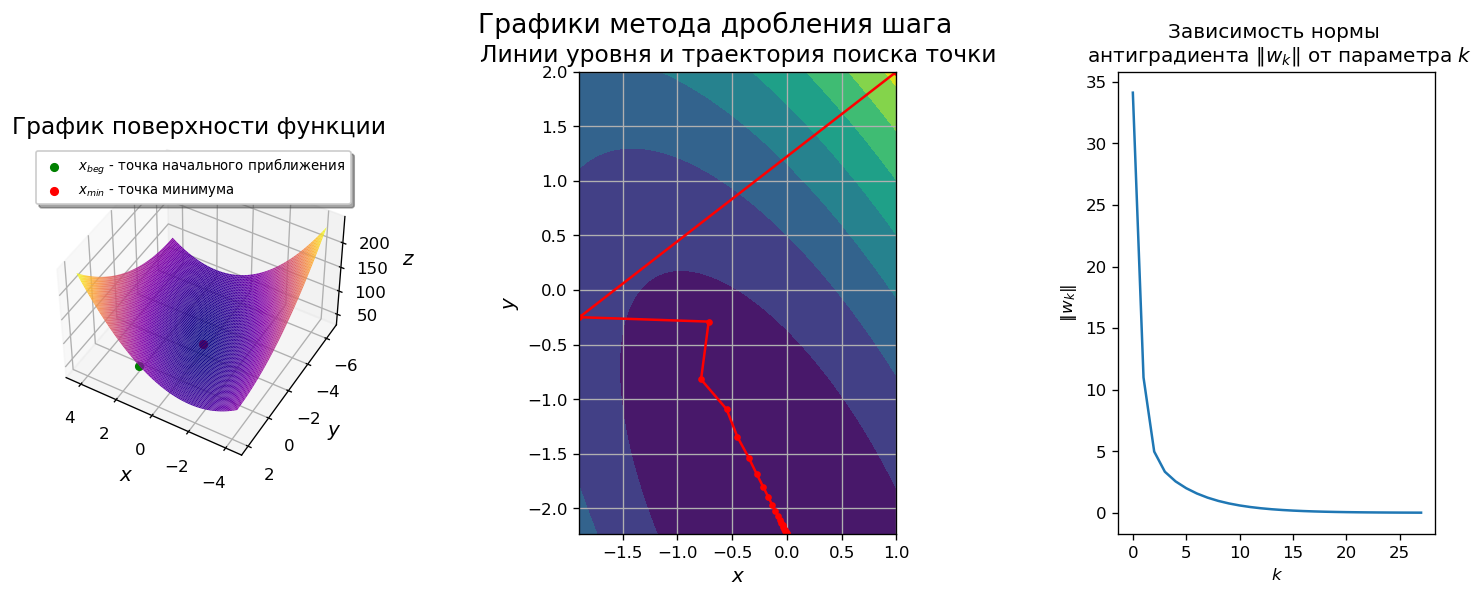

In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array

alpha = 200
e_help = 2
eps = 10**(-e_help)
x0 = [1, 2]
#foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) + 51
#foo = lambda x, y: 5 * (x - 10 - y)**2 + (3*x - 1)**2 + 35


def method_goldenRatio(f, b: float = 5, a: float = 0, e = eps * 1e-1):
    tau = (math.sqrt(5) + 1) / 2
    n_f = 0
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Bk - (Bk - Ak) / tau
    Xk2 = Ak + (Bk - Ak) / tau
    
    y1, y2 = f(Xk1), f(Xk2)
    n_f += 2

    while lk > e:
        if y1 < y2:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = f(Xk1)
            n_f += 1
        else:
            
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = f(Xk2)
            n_f += 1
        lk = Bk - Ak
    return (Ak + Bk) / 2, n_f


x_, y_ = Symbol('x'), Symbol('y')
grad_f = lambdify((x_, y_), derive_by_array(foo(x_, y_), (x_, y_)), 'numpy')


# x = [-1, -2] -- дефолтное начальное приближение 
# flag = 0 / 1 --  метод наискорейшего спуска / метод дробления шага
def gradient_decent(flag = 0, x = x0):
    
    f = lambda x: foo(x[0], x[1])
    anti_grad = lambda x: -grad_f(x[0], x[1])
    
    n_f = 0
    n_g = 0

    kappa = 0.5
    kappa_k = 1

    omega = 0.3
    gamma = 0.8

    # wk -- k-направление спуска, w_norm -- норма вектора направления w
    #||wk|| <= eps -- критерий останова 
    w_norm = []
    xk = [[], []]

    while True:

        xk[0].append(x[0])
        xk[1].append(x[1])

        wk = anti_grad(x)
        n_g += 1
        w_norm.append(np.linalg.norm(wk))
        
        if w_norm[-1] <= eps:
            break
        
        fk = f(x)
        n_f += 1
        #метод наискорейшего спуска
        if flag == 0:
            temp = 0
            phi_k = lambda kappa: f(x + kappa * wk)            
            kappa_k, temp = method_goldenRatio(phi_k)
            x = x + kappa_k * wk
            n_f += temp
        #метод дробления шага
        elif flag == 1:
            x_cur = x + kappa_k * wk
            n_f += 1
            while fk - f(x_cur) <= omega * kappa_k * w_norm[-1]**2:
                kappa_k *= gamma
                x_cur = x + kappa_k * wk
                n_f += 1
            x = x_cur
            
    return x, xk, w_norm, n_f, n_g


#def draw_counterplot_only(x_min, xk, w_norm, flag):
    fig, ax = plt.subplots(figsize = (10,10))

    
    x, y = np.meshgrid(np.linspace(min(xk[0]), max(xk[0]), 1000), np.linspace(min(xk[1]), max(xk[1]), 1000))
    
    #x, y = np.meshgrid(np.linspace(xk[0][0], xk[0][-1], 1000), np.linspace(xk[1][0], xk[1][-1], 1000))
    z = foo(x, y)

    # построим линии уровня
    ax.contourf(x, y, z)
    # траектория поиска точки минимума
    ax.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')

    # подписи к осям
    ax.set_xlabel('$x$', fontsize = 15)
    ax.set_ylabel('$y$', fontsize = 15)
    ax.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 16})

    # создадим сетку 
    plt.grid(linestyle = '-')

    plt.show()

    pass

def draw_all(x_min, xk, w_norm, flag):

    fig = plt.figure(figsize = (15, 5), dpi=120)

    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    plt.subplots_adjust(wspace=0.7)


    if flag == 0:
        fig.suptitle("Графики метода наискорейшего спуска", fontsize = 16)
    elif flag == 1:
        fig.suptitle("Графики метода дробления шага", fontsize = 16)
        

    coef = max(abs(x0[0] - x_min[0]), abs(x0[1]-x_min[1]))
    x, y = np.meshgrid(np.linspace(x_min[0] - coef, x_min[0] + coef, 100),np.linspace(x_min[1] - coef, x_min[1] + coef, 100))
    z = foo(x, y)

    ax1.plot_surface(x,y,z, rstride=1, cstride=1, cmap = "plasma")
    ax1.scatter(xk[0][0], xk[1][0], foo(xk[0][0], xk[1][0]), s = 20, c = 'green', label="$x_{beg}$ - точка начального приближения")
    ax1.scatter(x_min[0], x_min[1], foo(x_min[0], x_min[1]), s = 20, c = 'red', label="$x_{min}$ - точка минимума")
    ax1.legend(shadow=True, fontsize=8)
    ax1.view_init(45, 120)
    ax1.set_xlabel('$x$', fontsize = 12)
    ax1.set_ylabel('$y$', fontsize = 12)
    ax1.set_zlabel('$z$', fontsize = 12)
    ax1.set_title('График поверхности функции', fontdict = {'fontsize' : 14})


    #x, y = np.meshgrid(xk[0], xk[1])
    x, y = np.meshgrid(np.linspace(min(xk[0]), max(xk[0]), 1000), np.linspace(min(xk[1]), max(xk[1]), 1000))

    z = foo(x, y)
    #ax2.
    # построим линии уровня
    ax2.contourf(x, y, z)
    # траектория поиска точки минимума
    ax2.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')
    # подписи к осям
    ax2.set_xlabel('$x$', fontsize = 12)
    ax2.set_ylabel('$y$', fontsize = 12)
    ax2.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 14})

    # создадим сетку 
    ax2.grid(linestyle = '-')

    k = range(len(w_norm))
    #x, y = np.meshgrid(k , w_norm)
    ax3.plot(k, w_norm)
    ax3.set_xlabel('$k$')
    ax3.set_ylabel('$ \| \! \| w_k \| \! \| $')
    ax3.set_title('Зависимость нормы \n антиградиента $ \| \! \| w_k \| \! \| $ от параметра $k$')



    pass


print("\n", ' ' * 30, "Методы градиентного спуска","\n")
print("Дано:")
print("-" * 24)
print("      Целевая функция:    f(x, y) =", foo(x_,y_))
print("Начальное приближение:    (x, y) =", x0)
print(" Точность приближения:    eps =", eps)
print("-" * 24)
for i in range (2):
    print("\n" + "_" * 80)
    if i == 0:
        print("\n", ' ' * 30, "Метод наискорейщего спуска\n")
    elif i == 1:
        print("\n", ' ' * 30, "Метод градиентного спуска")
        print(' ' * 34, "с дроблениес шага\n")
    x_min, xk, w_norm, n_f, n_g = gradient_decent(i)
    print("           Точка минимума функции:  x_min =", [ round(x_min[0], e_help) , round(x_min[1], e_help)])
    print("Значение функции в точке минимума:  f(x_min) =", round(foo(x_min[0], x_min[1]), e_help))
    print("              Количество итераций:  k =", len(w_norm) - 1)
    print("    Количество вычислений функции:  n_f =", n_f)
    print("Количество вычисленных градиентов:  n_g =", n_g)
    draw_all(x_min, xk, w_norm, i)
plt.show()
    
